In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.tseries.offsets import *

from sklearn import linear_model

In [2]:
# Use matplotlib's ggplot style
plt.style.use('ggplot')

In [3]:
# Enable IPython's matplotlib mode
# Use the inline backend, which embeds plots inside the Notebook:
%matplotlib inline

# Enable matplotlib's interactive backend for use in the notebook, 'nbagg'.
# With this backend you get interactive panning and zooming of matplotlib figures in the browser.
% matplotlib notebook

In [4]:
# Get dengue data
data = pd.read_excel('/Users/gafiore/code/flu/Dengue_trends_AM_111.xls', index_col='Date')

In [5]:
data.columns

Index(['Dengue CDC', 'dengue searches'], dtype='object')

<IPython.core.display.Javascript object>


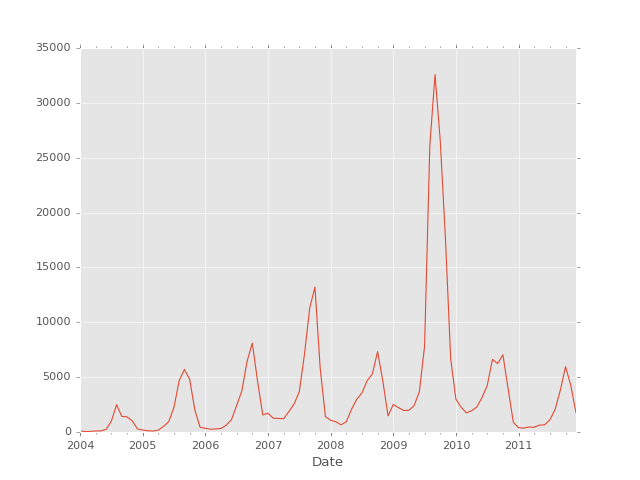

In [6]:
data['Dengue CDC'].plot();

<IPython.core.display.Javascript object>


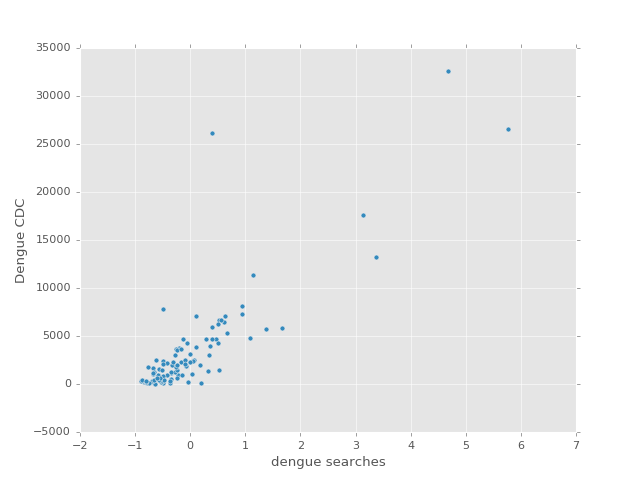

In [7]:
data.plot.scatter(x='dengue searches', y='Dengue CDC');

In [8]:
X = data['dengue searches'].reshape(-1, 1)
X = pd.DataFrame(X, index=data.index)
y = data['Dengue CDC']

In [9]:
# Split the data intro training/testing sets
X_train = X.loc[:'20061201',:]
X_test = X.loc['20070101':,:]

In [10]:
# Split the targets into training/testing sets
y_train = y[:'20061201']
y_test = y['20070101':]

In [11]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [12]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# Predict using the testing set
y_pred = regr.predict(X_test)

In [14]:
# The y-intercept
print('y-intercept: \n', regr.intercept_)
# The slope
print('slope: \n', regr.coef_)
# The mean square error
print('Residual sum of squares: %.2f' % np.mean((y_pred - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

y-intercept: 
 2155.25181371
slope: 
 [ 2926.37898735]
Residual sum of squares: 18468007.27
Variance score: 0.54


<IPython.core.display.Javascript object>


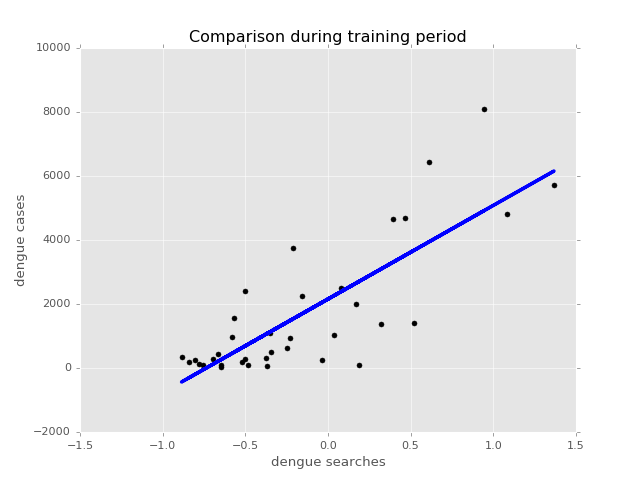

In [15]:
# Compare during the training period
y_pred_train = pd.Series(regr.predict(X_train), index=X_train.index)
plt.figure();
plt.scatter(X_train, y_train, color='black');
plt.plot(X_train, y_pred_train, color='blue', linewidth=3);
plt.xlabel('dengue searches');
plt.ylabel('dengue cases');
plt.title('Comparison during training period');

<IPython.core.display.Javascript object>


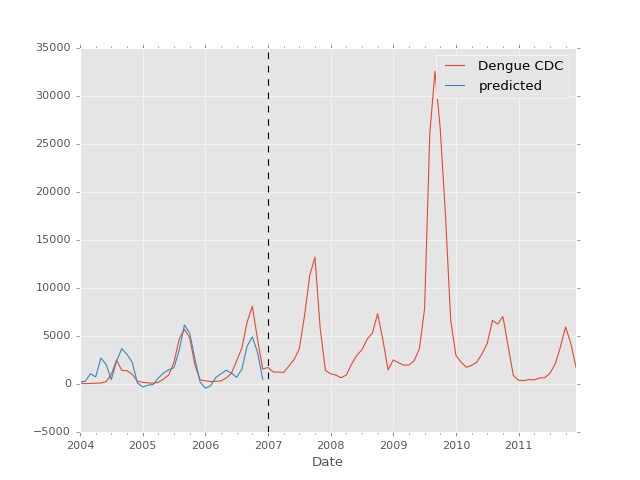

In [16]:
plt.figure();
data['Dengue CDC'].plot();
y_pred_train.plot(label='predicted');
plt.legend();
plt.axvline('2007-01-01', linestyle='--', color='k');

<IPython.core.display.Javascript object>


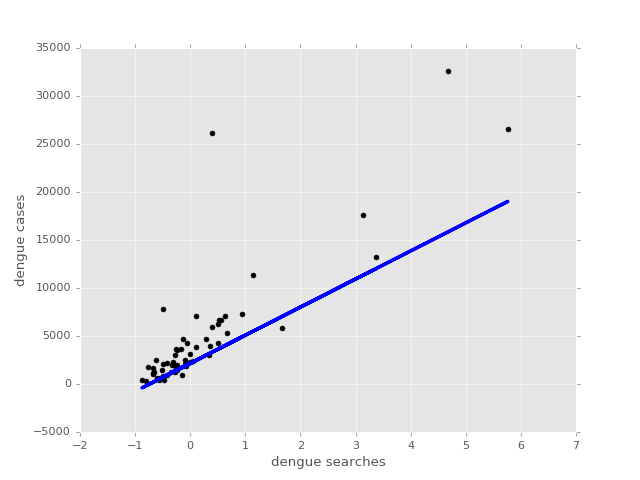

In [17]:
y_pred = pd.Series(y_pred, index=y_test.index)
# Plot predictions
plt.figure();
plt.scatter(X_test, y_test, color='black');
plt.plot(X_test, y_pred, color='blue', linewidth=3);
plt.xlabel('dengue searches');
plt.ylabel('dengue cases');

<IPython.core.display.Javascript object>


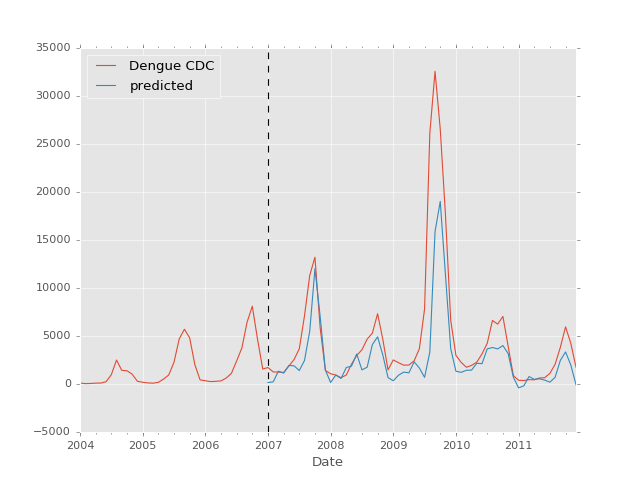

In [18]:
plt.figure();
data['Dengue CDC'].plot();
y_pred.plot(label='predicted');
plt.legend(loc='best');
plt.axvline('2007-01-01', linestyle='--', color='k');

In [19]:
for month in y_test.index:
    prev_month = month - DateOffset(months=1)
    regr.fit(X.loc[:prev_month,:], y[:prev_month])
    y_pred[month] = regr.predict(X.at[month,0])    

<IPython.core.display.Javascript object>


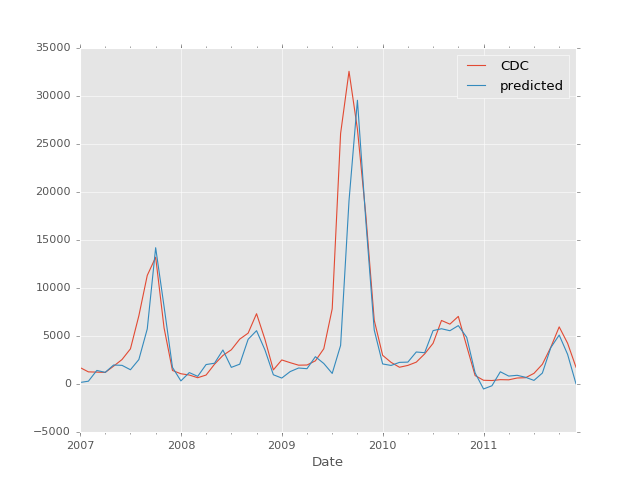

In [20]:
plt.figure();
y_test.plot(label='CDC');
y_pred.plot(label='predicted');
plt.legend();